#**Autores:** Jhon Jairo Castillo - Juan Camilo Tobar

**INTRODUCCION:**

En el presente cuaderno se mostrara el desarrollo de diferentes modelos de redes neuronales para predecir una serie de tiempo, ademas en cuadernos adjuntos al presente se presentaran modelos para clasificar diferentes sonidos asi como una aplicacion de HAR.

Para ello se trabajar a partir de modelos basados en MLP y redes recurrentes como LSTM, la convolucion 1D en caso de la aplicacion HAR y la clasificacion de sonido usando herraminetas como el espectrograma y modelos basados en convolucion 2D.

In [1]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
# semilla aleatoria para rerpoducibilidad
numpy.random.seed(7)

## Acondicionando dataset

Para el primer punto se tiene un dataset de series de tiempo el cual muestra el numero de pasajeros en miles de una aerolinea a traves del tiempo desde 1949 a 1960, el conjunto de datos tiene un total de 144 muestras a lo largo de los años

In [2]:
# cargamos el conjunto de datos
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

Realizamos un grafico de la serie

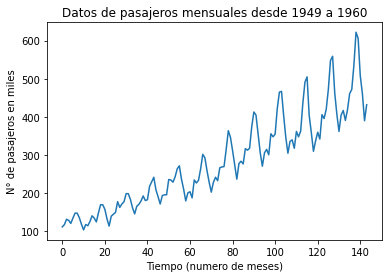

In [3]:
plt.plot(dataset)
plt.title("Datos de pasajeros mensuales desde 1949 a 1960")
plt.xlabel("Tiempo (numero de meses)")
plt.ylabel("N° de pasajeros en miles")
plt.show()

In [4]:
#dividimos datos en entreno y datos para el test
train_size = int(len(dataset) * 0.70) #100 datos para entrenamiento
test_size = len(dataset) - train_size #44 datos para validacion
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

100 44


A continuacion se crea una funcion que permite crear el dataset donde el parametro look_back que es el número de pasos de tiempo previos que se deben utilizar como variables de entrada para predecir el siguiente período de tiempo.

Este valor por defecto creará un conjunto de datos donde X es el número de pasajeros en un momento dado (t) e Y es el número de pasajeros en el momento siguiente de tiempo (t+look_back).

In [5]:
# convertir un array de valores en una matriz de conjuntos de datos
def create_dataset(dataset, look_back):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return numpy.array(dataX), numpy.array(dataY)

##MLP a un paso

A continuacion obtenemos nuestros datos de entrenamiento y validacion con una ventana de 1

In [6]:
# remodelamos X=t y Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)



Creamos el modelo MLP

In [7]:
# crear y adaptar el modelo Perceptron multicapa
model = Sequential()
model.add(Dense(14, input_dim=look_back, activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                28        
                                                                 
 dense_1 (Dense)             (None, 8)                 120       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________


CALCULO DE PARAMETROS

capa 1:
la ventana es de 1, 14 neuronas 
capa 1 = 1*14 + 14 = 28

---------------------
capa 2: la salida anterior es de 14, con 8 neuronas

capa 2= 14*8 +8=120

__________
capa 3= la salida de la capa anterior es 8 , con 1 neurona

capa 3= 8*1 +1 = 9

total parametros = 28+120+9= 157



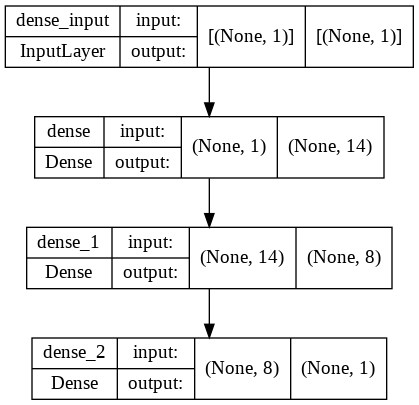

In [8]:
keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [9]:
#entrenamiento del modelo
model.compile(loss='mean_squared_error', optimizer='adam')
history1=model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
49/49 - 1s - loss: 42236.9023 - 596ms/epoch - 12ms/step
Epoch 2/200
49/49 - 0s - loss: 30978.6055 - 69ms/epoch - 1ms/step
Epoch 3/200
49/49 - 0s - loss: 21408.8984 - 55ms/epoch - 1ms/step
Epoch 4/200
49/49 - 0s - loss: 13081.0234 - 54ms/epoch - 1ms/step
Epoch 5/200
49/49 - 0s - loss: 6957.9058 - 61ms/epoch - 1ms/step
Epoch 6/200
49/49 - 0s - loss: 3095.0076 - 58ms/epoch - 1ms/step
Epoch 7/200
49/49 - 0s - loss: 1283.9050 - 61ms/epoch - 1ms/step
Epoch 8/200
49/49 - 0s - loss: 700.1066 - 61ms/epoch - 1ms/step
Epoch 9/200
49/49 - 0s - loss: 597.2149 - 62ms/epoch - 1ms/step
Epoch 10/200
49/49 - 0s - loss: 564.5039 - 56ms/epoch - 1ms/step
Epoch 11/200
49/49 - 0s - loss: 562.6080 - 55ms/epoch - 1ms/step
Epoch 12/200
49/49 - 0s - loss: 565.5688 - 68ms/epoch - 1ms/step
Epoch 13/200
49/49 - 0s - loss: 564.7433 - 55ms/epoch - 1ms/step
Epoch 14/200
49/49 - 0s - loss: 565.0241 - 55ms/epoch - 1ms/step
Epoch 15/200
49/49 - 0s - loss: 562.1183 - 54ms/epoch - 1ms/step
Epoch 16/200
49/49 - 

GRAFICO DE LOSS

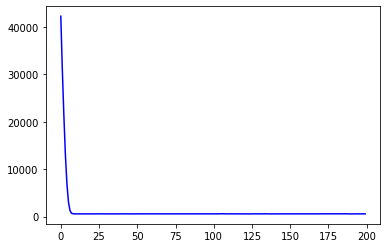

In [10]:
plt.plot(history1.history["loss"],'b')

A continuacion se realiza el calculo de error tanto en los datos de validacion como entrenamiento del modelo.

In [11]:
# Estimacion del rendimiento del modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Resultado del entrenamiento: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Resultado del test: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))


Resultado del entrenamiento: 561.85 MSE (23.70 RMSE)
Resultado del test: 2558.32 MSE (50.58 RMSE)


El siguiente fragmento de codigo permite realizar el grafico de la salida de los datos de prediccion (Morado)y compararlos con los datos de entrenamiento(rojo) asi como con el dataset completo(Azul)

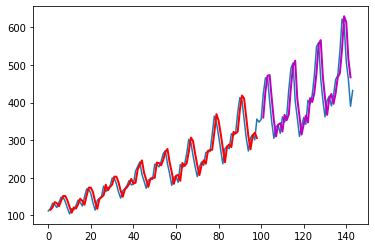

In [12]:
# predicciones del entrenamiento generadas
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones de la prueba de desplazamiento para plotear
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# ploteamos la línea de base y las predicciones
plt.plot(dataset)
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.show()

Podemos observar que la prediccion es acertada con una ventana de 1 paso sin embargo los RMSE aun son elevados al tener 28.81% de RMSE en entrenamiento y un 50.72% en validacion

##MLP a varios pasos

Para este modelo se aumenta el tamaño de la ventana a 10 y se crea un modelo con la arquitectura anterior para realizar la comparacion apropiada.

In [13]:
# remodelamos X=t y Y=t+1
look_back = 10
trainX2, trainY2 = create_dataset(train, look_back)
testX2, testY2 = create_dataset(test, look_back)

In [33]:
print(trainX2)

[[112. 118. 132. 129. 121. 135. 148. 148. 136. 119.]
 [118. 132. 129. 121. 135. 148. 148. 136. 119. 104.]
 [132. 129. 121. 135. 148. 148. 136. 119. 104. 118.]
 [129. 121. 135. 148. 148. 136. 119. 104. 118. 115.]
 [121. 135. 148. 148. 136. 119. 104. 118. 115. 126.]
 [135. 148. 148. 136. 119. 104. 118. 115. 126. 141.]
 [148. 148. 136. 119. 104. 118. 115. 126. 141. 135.]
 [148. 136. 119. 104. 118. 115. 126. 141. 135. 125.]
 [136. 119. 104. 118. 115. 126. 141. 135. 125. 149.]
 [119. 104. 118. 115. 126. 141. 135. 125. 149. 170.]
 [104. 118. 115. 126. 141. 135. 125. 149. 170. 170.]
 [118. 115. 126. 141. 135. 125. 149. 170. 170. 158.]
 [115. 126. 141. 135. 125. 149. 170. 170. 158. 133.]
 [126. 141. 135. 125. 149. 170. 170. 158. 133. 114.]
 [141. 135. 125. 149. 170. 170. 158. 133. 114. 140.]
 [135. 125. 149. 170. 170. 158. 133. 114. 140. 145.]
 [125. 149. 170. 170. 158. 133. 114. 140. 145. 150.]
 [149. 170. 170. 158. 133. 114. 140. 145. 150. 178.]
 [170. 170. 158. 133. 114. 140. 145. 150. 178.

In [14]:
# crear y adaptar el modelo Perceptron multicapa
model2 = Sequential()
model2.add(Dense(14, input_dim=look_back, activation='relu'))
model2.add(Dense(8,  activation='relu'))
model2.add(Dense(1))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 14)                154       
                                                                 
 dense_4 (Dense)             (None, 8)                 120       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 283
Trainable params: 283
Non-trainable params: 0
_________________________________________________________________


CALCULO DE PARAMETROS

capa 1:
la ventana es de 10, 14 neuronas 
capa 1 = 10*14 + 14 = 154

---------------------
capa 2: la salida anterior es de 14, con 8 neuronas

capa 2= 14*8 +8=120

__________
capa 3= la salida de la capa anterior es 8 , con 1 neurona

capa 3= 8*1 +1 = 9

total parametros = 154+120+9= 283

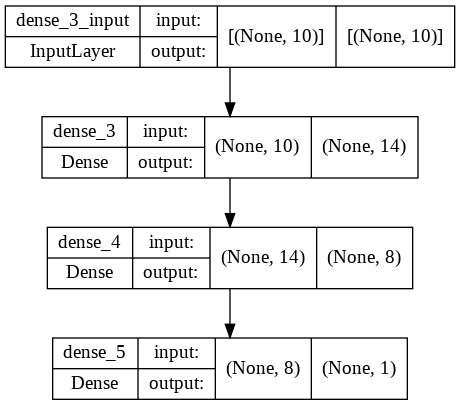

In [15]:
keras.utils.plot_model(model2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [16]:
model2.compile(loss='mean_squared_error', optimizer='adam')
history2=model2.fit(trainX2, trainY2, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
45/45 - 0s - loss: 6273.4595 - 414ms/epoch - 9ms/step
Epoch 2/200
45/45 - 0s - loss: 1470.5590 - 54ms/epoch - 1ms/step
Epoch 3/200
45/45 - 0s - loss: 1413.4626 - 60ms/epoch - 1ms/step
Epoch 4/200
45/45 - 0s - loss: 1423.0154 - 58ms/epoch - 1ms/step
Epoch 5/200
45/45 - 0s - loss: 1283.4136 - 56ms/epoch - 1ms/step
Epoch 6/200
45/45 - 0s - loss: 1445.7347 - 57ms/epoch - 1ms/step
Epoch 7/200
45/45 - 0s - loss: 1370.9911 - 62ms/epoch - 1ms/step
Epoch 8/200
45/45 - 0s - loss: 1302.2859 - 61ms/epoch - 1ms/step
Epoch 9/200
45/45 - 0s - loss: 1218.5424 - 56ms/epoch - 1ms/step
Epoch 10/200
45/45 - 0s - loss: 1366.0042 - 55ms/epoch - 1ms/step
Epoch 11/200
45/45 - 0s - loss: 1229.8373 - 55ms/epoch - 1ms/step
Epoch 12/200
45/45 - 0s - loss: 1191.8843 - 59ms/epoch - 1ms/step
Epoch 13/200
45/45 - 0s - loss: 1276.9431 - 68ms/epoch - 2ms/step
Epoch 14/200
45/45 - 0s - loss: 1099.9685 - 64ms/epoch - 1ms/step
Epoch 15/200
45/45 - 0s - loss: 1162.9825 - 59ms/epoch - 1ms/step
Epoch 16/200
45/45

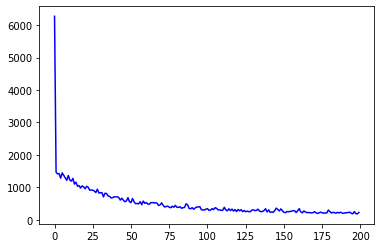

In [17]:
plt.plot(history2.history["loss"],'b')

In [18]:
# Estimacion del rendimiento del modelo
trainScore = model2.evaluate(trainX2, trainY2, verbose=0)
print('Resultado del entrenamiento: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model2.evaluate(testX2, testY2, verbose=0)
print('Resultado del test: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))


Resultado del entrenamiento: 202.11 MSE (14.22 RMSE)
Resultado del test: 763.42 MSE (27.63 RMSE)


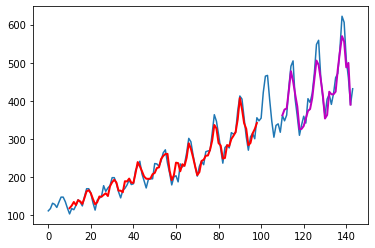

In [19]:
# predicciones del entrenamiento generadas
trainPredict = model2.predict(trainX2)
testPredict = model2.predict(testX2)
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones de la prueba de desplazamiento para plotear
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# ploteamos la línea de base y las predicciones
plt.plot(dataset)
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.show()

Cabe resaltar que al hacer la prediccion queda un espacio donde no hay prediccion debido al tamaño de la ventana y la forma en como se crea el dataset debido a los retrasos en la señal

Podemos observar que el RMSE de entrenamiento y validacion disminuyeron a 17.01% y 36.89% lo que genera unos resultados mas acertados y que se pueden corroborar en el grafico anterior

A continuacion realizaremos la prediccion del modelo a 2 y 3 pasos, para ello se debe concatenar el valor de la prediccion del modelo al ultimo dato de la entrada, para ello se debe realizar un desplazamiento de los datos y sustituir el valor que queda vacio por el dato predicho por el modelo con la entrada anterior, esto hará que se retroalimente la entrada del modelo

El RMSE para dos pasos es: 37.826115320620346


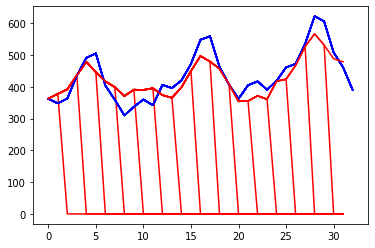

In [69]:
import numpy as np
#Predicción de dos pasos
Ypredic2=np.zeros((32,1))
for j in range(0,32,2):
  Dato1=testX2[j,0:10]
  Dato1E=(np.expand_dims(Dato1,0))
  Ypredic2[j,0]=model2.predict(Dato1E)
  Dato2=testX2[j+1,0:10]
  Dato2E=(np.expand_dims(Dato2,0))
  Dato2E[0,9]=Ypredic2[j]
  Ypredic2[j+1,0]=model2.predict(Dato2E)

  plt.plot(testY2,'b',Ypredic2,'r')

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(testY2[0:-1], Ypredic2)
RMSE = math.sqrt(MSE)
print("El RMSE para dos pasos es:",RMSE)

Podemos ver que el modelo tiene un RMSE del 36% el cual es mas alto que con la prediccion a un solo paso

Comprobamos que testX queda con los valores de prediccion y realiza los retardos esperados

In [55]:
print(testX2)

[[355.      422.      465.      467.      404.      347.      305.
  336.      340.      318.     ]
 [422.      465.      467.      404.      347.      305.      336.
  340.      318.      362.70065]
 [465.      467.      404.      347.      305.      336.      340.
  318.      362.70065 377.9161 ]
 [467.      404.      347.      305.      336.      340.      318.
  362.      348.      391.9401 ]
 [404.      347.      305.      336.      340.      318.      362.
  348.      363.      436.19595]
 [347.      305.      336.      340.      318.      362.      348.
  363.      436.19595 478.31604]
 [305.      336.      340.      318.      362.      348.      363.
  435.      491.      505.     ]
 [336.      340.      318.      362.      348.      363.      435.
  491.      505.      417.0454 ]
 [340.      318.      362.      348.      363.      435.      491.
  505.      417.0454  398.99887]
 [318.      362.      348.      363.      435.      491.      505.
  404.      359.      370.90787]


Prediccion a 3 pasos, al igual que el anterior se debe hacer un desplazamiento de datos sin embargo este desplazamiento se realiza 2 veces

El RMSE para dos pasos es: 37.346666477308105


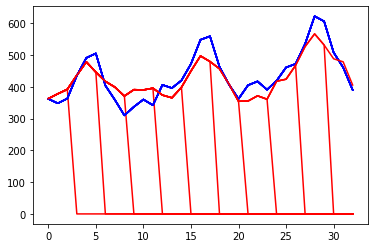

In [52]:
#Predicción de tres pasos
Ypredic3=np.zeros((33,1))
for j in range(0,33,3):
  Dato1=testX2[j,0:10]
  Dato1E=(np.expand_dims(Dato1,0))
  Ypredic3[j,0]=model2.predict(Dato1E)
  Dato2=testX2[j+1,0:10]
  Dato2E=(np.expand_dims(Dato2,0))
  Dato2E[0,9]=Ypredic3[j]
  Ypredic3[j+1,0]=model2.predict(Dato2E)
  Dato3=testX2[j+2,0:10]
  Dato3E=(np.expand_dims(Dato3,0))
  Dato3E[0,8]=Ypredic3[j]
  Dato3E[0,9]=Ypredic3[j+1]
  Ypredic3[j+2,0]=model2.predict(Dato3E)

  plt.plot(testY2,'b',Ypredic3,'r')

MSE = mean_squared_error(testY2, Ypredic3)
RMSE = math.sqrt(MSE)
print("El RMSE para tres pasos es:",RMSE)

Por ultimo para la prediccion a 3 pasos se tiene un RMSE de 37.34% el cual es un poco mayor que la prediccion a 2 pasos

## RED LSTM

Por ultimo se trabajara una red LSTM la cual es muy util para predecir series de tiempo gracias a su memoria, cabe resaltar que para obtener mejores resulatdos se deben normalizar los datos 

In [20]:

from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# cargamos el conjunto de datos
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python',skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalizamos el conjunto de datos
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# dividimos entre entranmiento y test
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


Creamos ventanas de 10 datos para predecir

In [80]:
# remodelamos X=t y Y=t+1
look_back = 10
trainX3, trainY3 = create_dataset(train, look_back)
testX3, testY3 = create_dataset(test, look_back)

In [81]:
# remodelamos la entrada para que sea[muestras, pasos de tiempo, características]
trainX3 = numpy.reshape(trainX3, (trainX3.shape[0], 1, trainX3.shape[1]))
testX3 = numpy.reshape(testX3, (testX3.shape[0], 1, testX3.shape[1]))

In [98]:

# creamos la LSTM network
modelLSTM = Sequential()
modelLSTM.add(LSTM(4, input_shape=(1, look_back)))
modelLSTM.add(keras.layers.Dense(13,activation='relu'))
modelLSTM.add(Dense(1))

modelLSTM.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 4)                 240       
                                                                 
 dense_7 (Dense)             (None, 13)                65        
                                                                 
 dense_8 (Dense)             (None, 1)                 14        
                                                                 
Total params: 319
Trainable params: 319
Non-trainable params: 0
_________________________________________________________________


CALCULO DE PARAMETROS

capa 1:
la ventana es de 10, 4 neuronas LSTM
capa 1 = 4((10*4)*4 +4) = 240

---------------------
capa 2: capa densa con 13 neuronas, la salida anterior es de 4

capa 2= 4*13+13=65
________________________
capa 3:capa densa de 1 neurona, la salidas anterior es de 13

capa 3= 13*1 +1 =14

----------
total parametros = 240+65+14=319

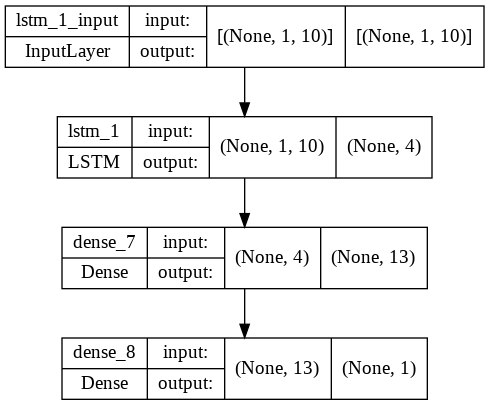

In [99]:
keras.utils.plot_model(modelLSTM, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [100]:
modelLSTM.compile(loss='mean_squared_error', optimizer='adam')
history3=modelLSTM.fit(trainX3, trainY3, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
85/85 - 2s - loss: 0.0281 - 2s/epoch - 20ms/step
Epoch 2/100
85/85 - 0s - loss: 0.0109 - 128ms/epoch - 2ms/step
Epoch 3/100
85/85 - 0s - loss: 0.0100 - 130ms/epoch - 2ms/step
Epoch 4/100
85/85 - 0s - loss: 0.0083 - 133ms/epoch - 2ms/step
Epoch 5/100
85/85 - 0s - loss: 0.0074 - 134ms/epoch - 2ms/step
Epoch 6/100
85/85 - 0s - loss: 0.0068 - 129ms/epoch - 2ms/step
Epoch 7/100
85/85 - 0s - loss: 0.0064 - 124ms/epoch - 1ms/step
Epoch 8/100
85/85 - 0s - loss: 0.0062 - 128ms/epoch - 2ms/step
Epoch 9/100
85/85 - 0s - loss: 0.0059 - 125ms/epoch - 1ms/step
Epoch 10/100
85/85 - 0s - loss: 0.0058 - 127ms/epoch - 1ms/step
Epoch 11/100
85/85 - 0s - loss: 0.0055 - 120ms/epoch - 1ms/step
Epoch 12/100
85/85 - 0s - loss: 0.0055 - 141ms/epoch - 2ms/step
Epoch 13/100
85/85 - 0s - loss: 0.0051 - 129ms/epoch - 2ms/step
Epoch 14/100
85/85 - 0s - loss: 0.0052 - 118ms/epoch - 1ms/step
Epoch 15/100
85/85 - 0s - loss: 0.0050 - 126ms/epoch - 1ms/step
Epoch 16/100
85/85 - 0s - loss: 0.0049 - 125ms/epoc

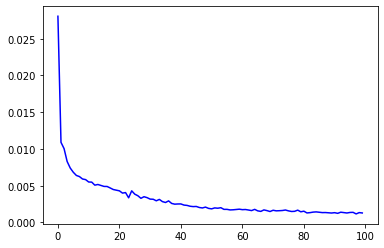

In [101]:
plt.plot(history3.history["loss"],'b')

In [102]:
# hacemos las predicciones
trainPredict = modelLSTM.predict(trainX3)
testPredict = modelLSTM.predict(testX3)
# invertimos las predicciones
trainPredict = scaler.inverse_transform(trainPredict)
trainY3 = scaler.inverse_transform([trainY3])
testPredict = scaler.inverse_transform(testPredict)
testY3 = scaler.inverse_transform([testY3])



In [103]:
# calculamos el error rms
trainScore = math.sqrt(mean_squared_error(trainY3[0], trainPredict[:,0]))
print('Resultado del entrenamiento: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY3[0], testPredict[:,0]))
print('Resultado del test: %.2f RMSE' % (testScore))

Resultado del entrenamiento: 18.20 RMSE
Resultado del test: 53.58 RMSE


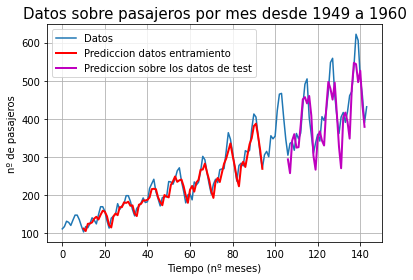

In [104]:

# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones del test de cambio para plotear
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
# ploteamos linea base y predicciones
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.legend( ('Datos', 'Prediccion datos entramiento', 'Prediccion sobre los datos de test'), loc = 'upper left')
plt.grid(True)
plt.title("Datos sobre pasajeros por mes desde 1949 a 1960", fontsize = 15)
plt.xlabel("Tiempo (nº meses)", fontsize = 10)
plt.ylabel("nº de pasajeros", fontsize = 10)
plt.show()

Podemos observar que con esta red se tienen un RMSE de 19.02% para la prediccion en los datos de entrenamiento y un 47.43% para los datos de validacion con una red de 4 neuronas LSTM

El RMSE para dos pasos es: 49.75808859542206


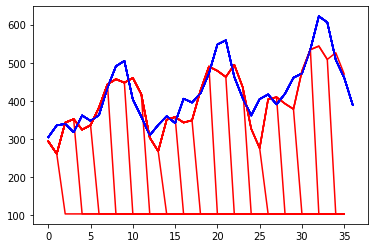

In [156]:
import numpy as np
#Predicción de dos pasos
Ypredic2=np.zeros((36,1))
for j in range(0,36,2):
  Dato1=testX3[j,0,0:10]
  Dato1E=(np.expand_dims(Dato1,0))
  Dato1EE=(np.expand_dims(Dato1E,0))
  Ypredic2[j,0]=modelLSTM.predict(Dato1EE)
  Dato2=testX3[j+1,:,0:10]
  Dato2E=(np.expand_dims(Dato2,0))
  Dato2[0,9]=Ypredic2[j]
  Ypredic2[j+1,0]=modelLSTM.predict(Dato2E)
  
  Ypredic2N=scaler.inverse_transform(Ypredic2)
  
  plt.plot(Ypredic2N,'r')
  plt.plot(testY3[0,:],'b')
#from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(testY3[0,:-1], Ypredic2N)
RMSE = math.sqrt(MSE)
print("El RMSE para dos pasos es:",RMSE)

Comprobamos que para dos pasos tambien crece el RMSE a 49.75% para el modelo con LSTM

El RMSE para tres pasos es: 55.32245015866787


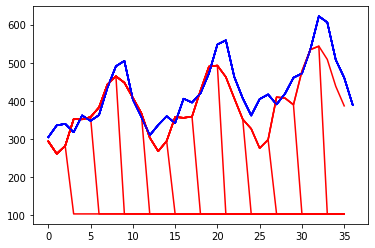

In [178]:
#Predicción de tres pasos
Ypredic3=np.zeros((36,1))
for j in range(0,36,3):
  Dato1=testX3[j,0:10]
  Dato1E=(np.expand_dims(Dato1,0))
  Ypredic3[j,0]=modelLSTM.predict(Dato1E)
  Dato2=testX3[j+1,0:10]
  Dato2E=(np.expand_dims(Dato2,0))
  Dato2[0,9]=Ypredic3[j]
  Ypredic3[j+1,0]=modelLSTM.predict(Dato2E)
  Dato3=testX3[j+2,0:10]
  Dato3E=(np.expand_dims(Dato3,0))
  Dato3[0,8]=Ypredic3[j]
  Dato3[0,9]=Ypredic3[j+1]
  Dato3EE=(np.expand_dims(Dato3E,0))
  Ypredic3[j+2,0]=modelLSTM.predict(Dato3E)

  Ypredic3N=scaler.inverse_transform(Ypredic3)

  plt.plot(Ypredic3N,'r')
  plt.plot(testY3[0,:],'b')

MSE = mean_squared_error(testY3[0,:-1], Ypredic3N)
RMSE = math.sqrt(MSE)
print("El RMSE para tres pasos es:",RMSE)

Por ultimo aplicando el modelo con retardo de 3 pasos se obtiene el RMSE aumenta al 55.32% 

##**CONCLUSIONES**

* Se puede obtener mejores resultados con una ventana adecuada.

* el modelo LSTM permite crear arquitecturas mas pequeñas en comparacion a los modelos MLP los cuales necesitan mas capas y mas neuronas.

* Cuando usamos retroalimentacion o prediccion en pasos la presicion es inversamente proporcional al numero de retrasos.





